In [6]:
#visualização de RMSE no jupyter
library(ggplot2)
mal=as.data.frame(read.table("ESC/random1-100/grouped_mal.txt"))
kal=as.data.frame(read.table("ESC/random1-100/grouped_kal.txt"))
sti=as.data.frame(read.table("ESC/random1-100/grouped_sti.txt"))


names(mal)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(kal)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(sti)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")



#Tirando a média 
tamanhoGap= seq(1,100,1) 
mediaKal=c()
mediaMal=c()
mediaSti=c()

sdKal=c()
sdMal=c()
sdSti=c()

sdLacKal=c()
sdLacMal=c()
sdLacSti=c()

mediaLacKal=c()
mediaLacMal=c()
mediaLacSti=c()

a=c()

for (i in seq(1,100,1)) {
    #calculando a média
	mediaKal=append(mediaKal,(mean(kal$time[seq(i,3000, 100)])))
	mediaMal=append(mediaMal,(mean(mal$time[seq(i,3000, 100)])))
	mediaSti=append(mediaSti,(mean(sti$time[seq(i,3000, 100)])))

    #Calculando o desvio padrão
	sdKal=append(sdKal,(sd(kal$time[seq(i,3000, 100)])))
	sdMal=append(sdMal,(sd(mal$time[seq(i,3000, 100)])))
	sdSti=append(sdSti,(sd(sti$time[seq(i,3000, 100)])))
}

mediaKal=as.data.frame(mediaKal)
names(mediaKal)=c("media")
mediaKal$sd=sdKal
mediaKal$tamanho=tamanhoGap
mediaKal$algoritmo="Kalman"

mediaMal=as.data.frame(mediaMal)
names(mediaMal)=c("media")
mediaMal$sd=sdMal
mediaMal$tamanho=tamanhoGap
mediaMal$algoritmo="Moving Average"


mediaSti=as.data.frame(mediaSti)
names(mediaSti)=c("media")
mediaSti$sd=sdSti
mediaSti$tamanho=tamanhoGap
mediaSti$algoritmo="Stine"

todos=rbind(mediaKal,mediaMal, mediaSti)

In [7]:
todos[which(todos$algoritmo=="Kalman"),]

media,sd,tamanho,algoritmo
1.403141,0.02176005,1,Kalman
1.401898,0.02203555,2,Kalman
1.402187,0.02313569,3,Kalman
1.401650,0.02180298,4,Kalman
1.404784,0.02972696,5,Kalman
1.401690,0.02500945,6,Kalman
1.401278,0.02394744,7,Kalman
1.400963,0.01937917,8,Kalman
1.404091,0.02643869,9,Kalman
1.407410,0.03182308,10,Kalman


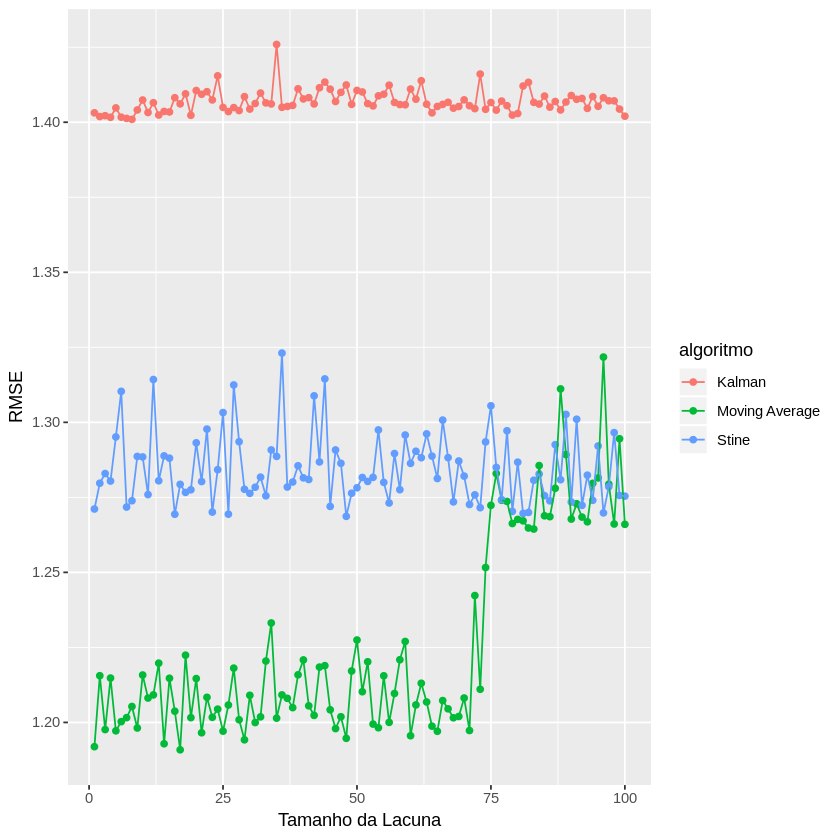

In [8]:
ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")


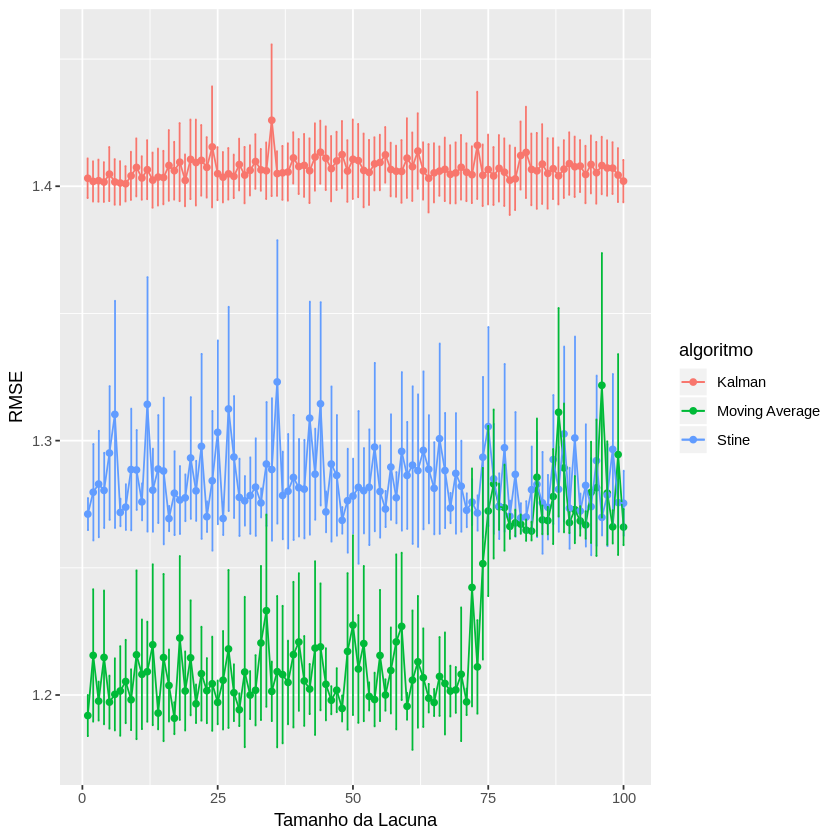

In [15]:
n=30 #tamanho da amostra. Ou seja, tem 30 lacunas de tamanho 100, 30 de tamanho 200... 30 de tamanho 4200
error=qnorm(0.975)*todos$sd/sqrt(n)
todos$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right

ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error),  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")


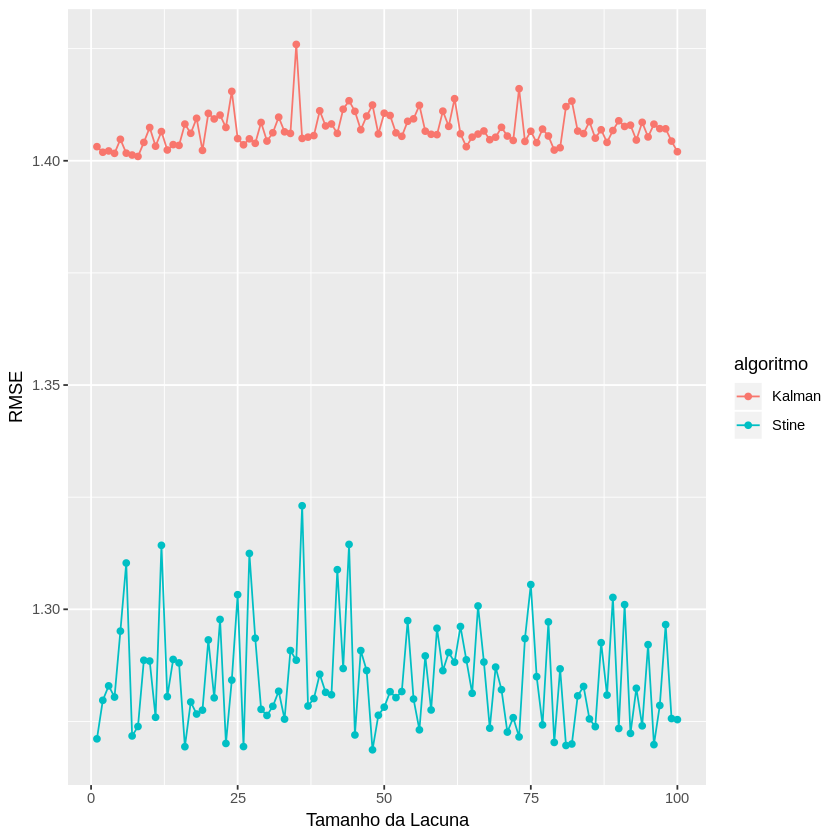

In [10]:
ggplot(todos[which(todos$algoritmo=="Kalman" | todos$algoritmo=="Stine"),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    #geom_errorbar(aes(ymin=media-error, ymax=media+error),,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")
    


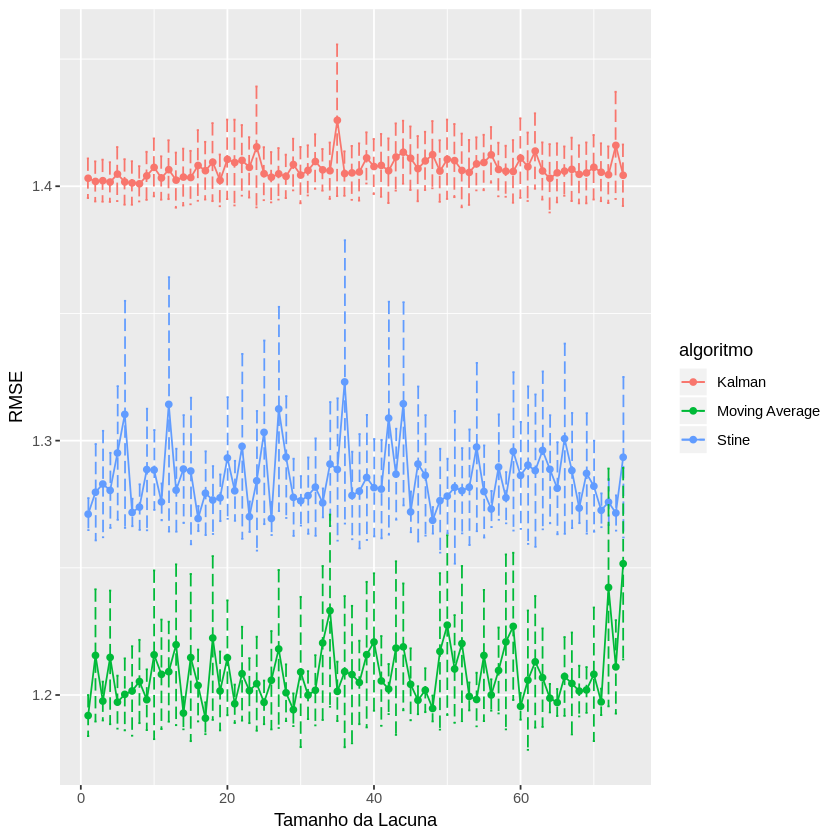

In [13]:
ggplot(todos[which(todos$tamanho<75),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,   position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")
    


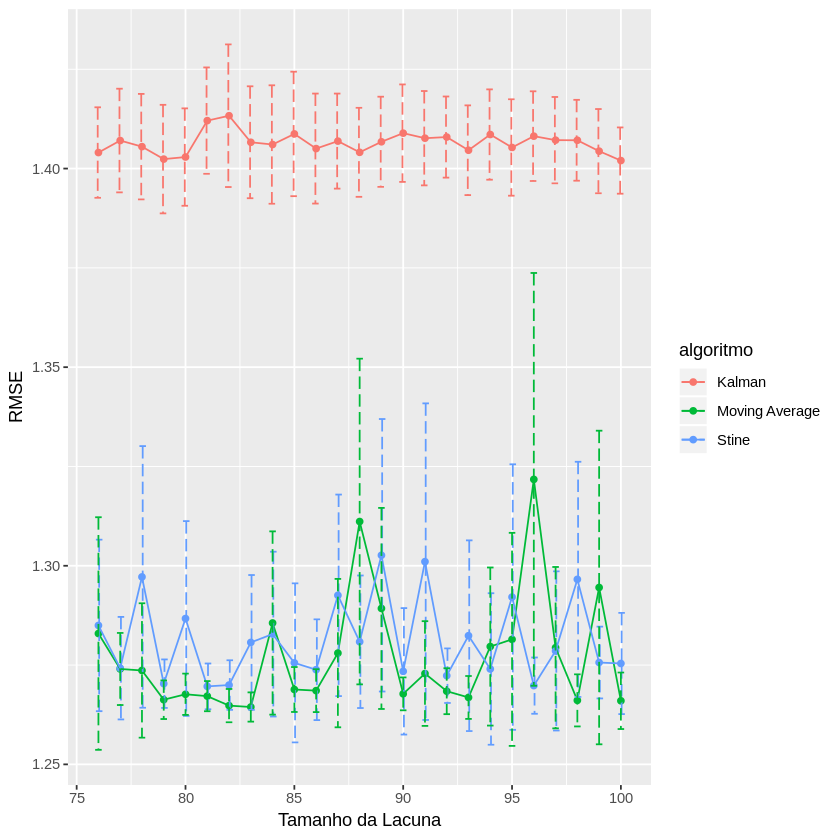

In [14]:
ggplot(todos[which(todos$tamanho>75),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,   position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")
    
